## Observations and Insights 

In [192]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pyma_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pyma_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [193]:
# Checking the number of mice.
pyma_df["Mouse ID"].value_counts()

g989    13
o562    10
j984    10
q787    10
o287    10
        ..
u153     1
d133     1
o848     1
v199     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [194]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
clean_df = pyma_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [195]:
clean_df["Mouse ID"].value_counts()

u327    10
k862    10
c282    10
f345    10
q511    10
        ..
o848     1
u153     1
n482     1
v199     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [196]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimens = list(clean_df["Drug Regimen"].unique())

print(regimens)

i = 0
stat_summary_df = pd.DataFrame()

for regimen in regimens:
    regimen_df = clean_df.loc[clean_df["Drug Regimen"] == regimen]
    regimen_name = regimen
    tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
    tumor_median = regimen_df["Tumor Volume (mm3)"].median()
    tumor_var = regimen_df["Tumor Volume (mm3)"].var()
    tumor_std = regimen_df["Tumor Volume (mm3)"].std()
    tumor_sem = regimen_df["Tumor Volume (mm3)"].sem()
    
    
    
    
    temp_df = pd.DataFrame(
        data={
            "Regimen": regimen_name,
            "Tumor Mean": tumor_mean,
            "Tumor Median": tumor_median,
            "Tumor Var": tumor_var,
            "Tumor STD": tumor_std,
            "Tumor SEM": tumor_sem,

        },
        index=[i]
    )
    i += 1
    stat_summary_df = stat_summary_df.append(temp_df)

stat_summary_df




['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']


,Regimen,Tumor Mean,Tumor Median,Tumor Var,Tumor STD,Tumor SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [197]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df["mean"] = clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
grouped_df["median"] = clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
grouped_df["var"] = clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()
grouped_df["std"] = clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
grouped_df["sem"] = clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
grouped_df
# This method produces everything in a single groupby function


Drug Regimen
Capomulin                                             0.329346
Ceftamin                                              0.469821
Infubinol                                             0.492236
Ketapril                                               0.60386
Naftisol                                              0.596466
Placebo                                               0.581331
Propriva                                              0.540135
Ramicane                                              0.320955
Stelasyn                                              0.573111
Zoniferol                                             0.516398
mean         Drug Regimen
Capomulin    40.675741
Ceftamin  ...
median       Drug Regimen
Capomulin    41.557809
Ceftamin  ...
var          Drug Regimen
Capomulin    24.947764
Ceftamin  ...
std          Drug Regimen
Capomulin    4.994774
Ceftamin   ...
sem          Drug Regimen
Capomulin    0.329346
Ceftamin   ...
Name: Tumor Volume (mm3), dtype: object

## Bar and Pie Charts

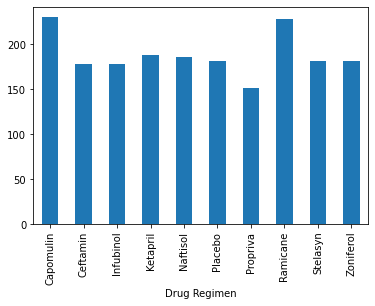

In [198]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_group_df = clean_df.groupby('Drug Regimen')
count_regimen_df = regimen_group['Drug Regimen'].count()
count_regimen_df


count_regimen_df.plot(x ='Number of Mice', y='Drug Type', kind = 'bar')





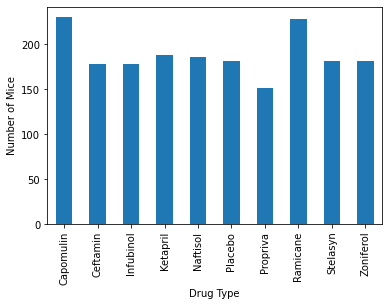

<Figure size 432x288 with 0 Axes>

In [199]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen_group = clean_df.groupby('Drug Regimen')
count_regimen = regimen_group['Drug Regimen'].count()
count_regimen

regimen_chart = count_regimen.plot(kind='bar')
regimen_chart.set_xlabel("Drug Type")
regimen_chart.set_ylabel("Number of Mice")


plt.show()
plt.tight_layout()



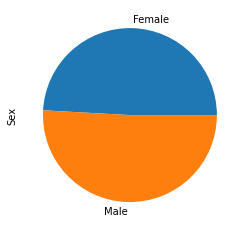

In [200]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


gender_group_df = clean_df.groupby('Sex')
count_gender_df = gender_group['Sex'].count()
count_gender_df

count_gender_df.plot(x ='Number of Mice', y='Sex', kind = 'pie')



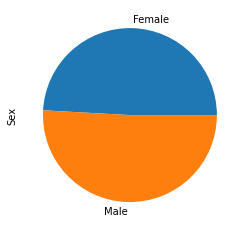

<Figure size 432x288 with 0 Axes>

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_chart = count_gender.plot(kind='pie')


plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [202]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mice = list(clean_df["Mouse ID"].unique())

reg_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


i = 0
final_tumor_df = pd.DataFrame()

for mouse in mice:
    mouse_df = clean_df.loc[clean_df["Mouse ID"] == mouse]
    mouse_id = mouse
    time = mouse_df["Timepoint"].max()
    drug = list(mouse_df["Drug Regimen"].unique())[0]
    if drug in reg_list:
        
        vol_df = mouse_df.loc[mouse_df["Timepoint"] == time]
    
        vol_df = vol_df.reset_index(drop=True)
        tumor_vol = vol_df.at[0, "Tumor Volume (mm3)"]
    

    
        temp_df = pd.DataFrame(
            data={
                "Mouse": mouse_id,
                "Final Timepoint": time,
                "Drug Regimen": drug,
                "Final Tumor Volume": tumor_vol

            },
            index=[i]
        )
        i += 1
        final_tumor_df = final_tumor_df.append(temp_df)

final_tumor_df





,Mouse,Final Timepoint,Drug Regimen,Final Tumor Volume
0,k403,45,Ramicane,22.050126
1,s185,45,Capomulin,23.343598
2,x401,45,Capomulin,28.484033
3,m601,45,Capomulin,28.430964
4,g791,45,Ramicane,29.128472
...,...,...,...,...
95,x822,45,Ceftamin,61.386660
96,y163,45,Infubinol,67.685569
97,y769,45,Ceftamin,68.594745
98,y865,45,Ceftamin,64.729837


In [203]:
# Put treatments into a list for for loop (and later for plot labels)
reg_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
voldatamort = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
interquartiles = final_tumor_df["Final Tumor Volume"].quantile([.25,.5,.75])
lowerq = interquartiles[0.25]
upperq = interquartiles[0.75]
iqr = upperq-lowerq
print(interquartiles)
print(iqr)

# Locate the rows which contain mice on each drug and get the tumor volumes    
# add subset     
# Determine outliers using upper and lower bounds

outlier_df = final_tumor_df.loc[(final_tumor_df["Final Tumor Volume"] < lowerq) | (final_tumor_df["Final Tumor Volume"] > upperq)]
outlier_df
    

    

0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Final Tumor Volume, dtype: float64
22.74251795250001


,Mouse,Final Timepoint,Drug Regimen,Final Tumor Volume
0,k403,45,Ramicane,22.050126
1,s185,45,Capomulin,23.343598
2,x401,45,Capomulin,28.484033
3,m601,45,Capomulin,28.430964
4,g791,45,Ramicane,29.128472
5,s508,45,Ramicane,30.276232
6,f966,20,Capomulin,30.485985
7,m546,45,Ramicane,30.564625
8,z578,45,Ramicane,30.638696
9,j913,45,Ramicane,31.560470


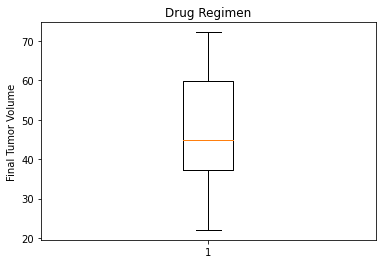

In [204]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(final_tumor_df["Final Tumor Volume"])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

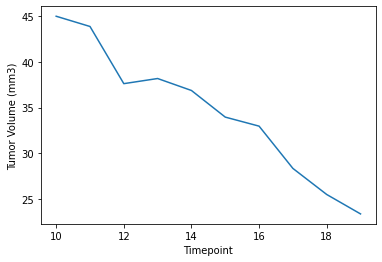

In [205]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mickey_df = clean_df.loc[clean_df['Mouse ID'] == "s185"]
mickey_df

mickey_chart = mickey_df["Tumor Volume (mm3)"].plot()
mickey_chart.set_xlabel("Timepoint")
mickey_chart.set_ylabel("Tumor Volume (mm3)")

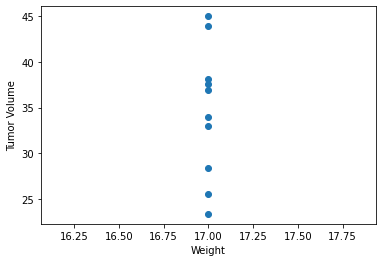

In [206]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mickey_chart = plt.scatter(mickey_df["Weight (g)"], mickey_df["Tumor Volume (mm3)"])
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

In [207]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

correlation = st.pearsonr(cap_df["Weight (g)"], cap_df["Tumor Volume (mm3)"])
print(correlation)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_df["Weight (g)"], cap_df["Tumor Volume (mm3)"])
print(rvalue)

(0.525699555207717, 9.605446629502006e-18)
0.5256995552077166
